# Project: Predicting Boston Housing Prices

In [1]:
# Import libraries necessary for this project
import pandas as pd
import numpy as np
from sklearn.model_selection import ShuffleSplit

# Import visualizations code written by Udacity
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)

# Success
print(f'Boson housing dataset has {data.shape[0]} data points with {data.shape[1]} variables each')

Boson housing dataset has 489 data points with 4 variables each


## Data Exploration

In [2]:
# Print the first 3 observations or data points.
data.head(3)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0


In [3]:
# Minimum price of the data
min_price = np.min(prices)

# Maximum price of the data
max_price = np.max(prices)

# Mean price of the data
mean_price = np.mean(prices)

# Median price of the data
median_price = np.median(prices)

# Standard deviation of prices of the data
std_price = np.std(prices)

# Print the statistics
print('Statistics for Boston housing dataset:\n')
print(f'Minimum price: ${min_price}')
print(f"Maximum price: ${max_price}")
print(f"Mean prince: ${mean_price}")
print(f"Median price: ${median_price}")
print(f"Standard deviation of prices: ${std_price}")

Statistics for Boston housing dataset:

Minimum price: $105000.0
Maximum price: $1024800.0
Mean prince: $454342.9447852761
Median price: $438900.0
Standard deviation of prices: $165171.13154429477


#### Feature Observation

Using our intuition, we can answer the following question: `How an increase or decrease in the value of the three features above would lead to an increase or decrease in the value of 'MEDV' (price) ?`

- An increase in __'RM'__ would lead to an increase of value of the price or __'MEDV'__ because more rooms imply more space and as we know in the real estate field, this feature is extremely valuable to buyers. Thus, we could expect a home that has en 'RM' value of 6 to be worth less than one that has 'RM' = 7, holding the other features equal.
- Intuitively we could say that an increase in the value of __'LSTAT'__ will have a negative effect on the price of a home because a high value of this feature will indicate that the neighborhood is poor, and therefore, one would expect that a neighborhood with an 'LSTAT' value higher (for example 20) to have homes worth less than the ones with an 'LSTAT' value lower (for example 10).
- We know that couples with kids prefer to live closer to a school but more importantly a school where teachers could have the ability to follow each kid. Thus, a neighborhood with a __'PTRATIO'__ value of 10 will have homes worth more than a neighborhood that has an 'PTRATIO' value of 15.

## Developing a Model

#### Implementation: Define a Performance Metric

In [4]:
# Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """Calculates and returns the performance score between
       true and predicted values based on the metric chosen."""
    
    # Calculate the performance scroe between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

In [5]:
# Quick test of our performance fonction
y_true = np.array([3., -.5, 2., 7., 4.2])
y_predict = np.array([2.5, .0, 2.1, 7.8, 5.3])

score = performance_metric(y_true, y_predict)
print(f"Model has a coefficient of determination, R^2, of {score:.2f}")

Model has a coefficient of determination, R^2, of 0.92


The model up here has successfully captured the variation of the target variable because we know that a good model is the one with R2 close to 1 and here our model has a R2 equal to 0.92

#### Implementation: Shuffle and Split Data

The benefit of splitting a dataset into some ratio of training and testing subsets for a learning algorithm is that we want to build a model that will predict an outcome in the future even though that future is yet to happen. For this reason, we need a subset of the data to train the model and another one to evaluate the reliability of this model. This technic allows us to avoid the errors of overfitting or underfitting the data in our model. For example, if we train our model with all the data points, we will end up with a model that will perform well in training but poorly in testing because all it will be doing is memorizing the data instead of learning the characteristics of the data; thus, we will have a model that overfit the data. On the others hand, if the subset of dataset allocated for training is too simple we will have a model that underfit the data.

In [6]:
# Import 'train_test_split'
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.20, random_state=12)

# Success
print("Training and Testing split was successful")

Training and Testing split was successful


## Analyzing Model Performance

#### Learning Curves

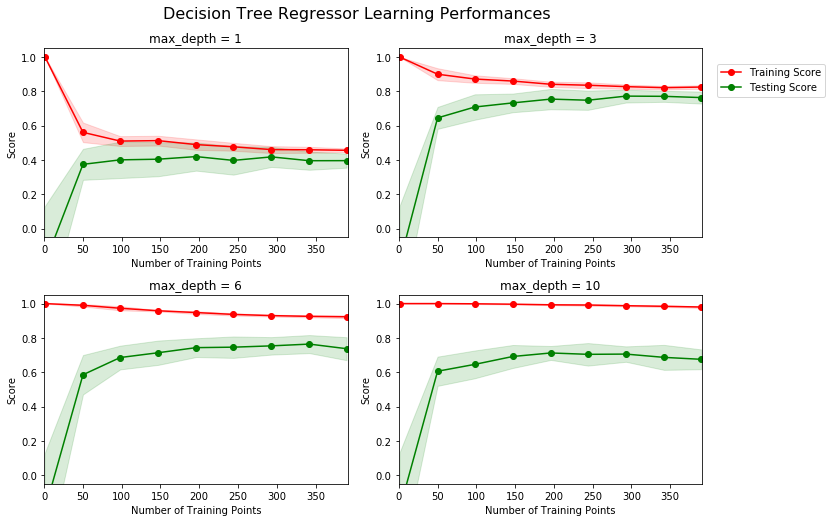

In [7]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

Based on the graphs up here we can see that the best model is the one with a maximum depth of 3. In this model, the score of the training curve increase slightly as more points are added and the Testing score curve will keep decreasing because the more we add points the more we get a model that is well trained. At some point this two curve will converge here it's between 300 and 350 points; thus, adding more points won't benefit the model. This model with a maximum depth of 3 is a good model because both curves, the training and testing, converge at a lower point.

#### Complexity Curves

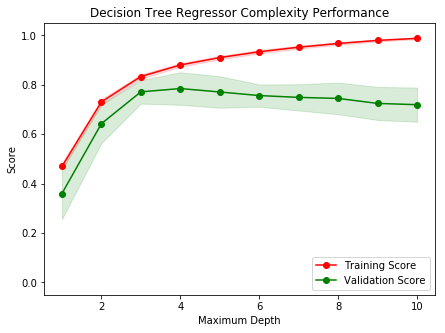

In [8]:
vs.ModelComplexity(X_train, y_train)

##### Bias-Variance Tradeoff

A model trained with a maximum depth of 1 suffer from high bias (underfit) because if we flip this graph upside down, we will see that at that depth the model has a high training error score and hight validation error score.

However, the model suffer from high variance (overfit) when trained with a maximum depth of 10; here we have a low training error score but the validation error score will keep increasing.

Now the question is `which maximum depth will result in a model that best generalizes to unseen data?`

Based on the Complexity Curve graph, we would say that the best model is the one with a maximum depth of 4 because it is the lowest point where both curves, `the training and validation`, converge together. My intruition is that after this point, we will have models that suffer from high variance or will just overfit the data; these models will do well on the training score because they will be memorising the data instead of generalizing.

## Evaluating Model Performance

In this section we will construct a model and make a prediction on the client's feature set using an optimized model from ``fit_model``.

#### Grid Search

__`What is the grid search technique?`__

Grid search is a technique that allows us to pick the best combination among many `hyper-parameters`. For example, for ``SVM`` we have “``Kernel`` that can be ``linear, poly, or rbf``” and we also have the “``C``” parameter that can be ``small`` or ``large``. If we had to combine these `hyper-parameters` manually it would be a difficult task. By using the Grid search technique, we create a table with all the possibility and then we pick the best one.

This technique can be applied to optimize a learning algorithm by passing many hyper-parameters to the algorithm, and therefore, we will have many models and the best model with the best parameters will be the optimal one and will be used for prediction.

#### Cross-Validation

__`What is the k-fold cross-validation training technique?`__

``K-fold cross-validation training`` is a technique that allows us to break down the data into ``“K” buckets``. The “K” here represents the number of groups that will be created and the number of times each group will be used as a testing set. In other words, after breaking down the data into “K” buckets, we train our model “K” times, each time using a different bucket as our testing set and the remaining buckets as our training set. The final model is found by averaging the result of all training.

K-fold cross validation helps grid search because all the data are used for training as well as testing. Thus, our model is no longer limited on using just one subset of data for training and the other for testing.

#### Implementation: Fitting a Model

Now it's time to bring everything together by training a model using the __decision tree algorithm.__ 

In [9]:
# Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    """ Perfroms grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]."""
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits=10, test_size = 0.20, random_state = 0)
    
    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()
    
    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': list(range(1, 11))}
    
    # Transform 'performance_metric' into a scoring function using 'make_scorer'
    scoring_fnc = make_scorer(performance_metric)
    
    # Create the grid search cv object
    grid = GridSearchCV(regressor, params, scoring_fnc, cv = cv_sets)
    
    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)
    
    # Return the optimal model after fitting the data
    return grid.best_estimator_

#### Making Predictions

Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a decision tree regressor, the model has learned what the best questions to ask about the input data are, and can respond with a prediction for the target variable. We can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

`What maximum depth does the optimal model have?`

In [10]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
max_depth = reg.get_params()['max_depth']
print(f"The optimal model has a maximum depth of {max_depth}.")

The optimal model has a maximum depth of 4.


#### Predicting Selling Prices

Let imagine that we were a real estate agency in the Boston area looking to use this model to help price homes owned by our clients that they wish to sell. We have collected the following information from three of our clients:

| __Feature__                            |__Client 1__|__Client 2__|__Client 3__|
|-------------------------------------------------------------------------------|
|Total number of rooms in home           | 5 rooms    | 4 rooms    | 8 rooms    |
|Neighborhood poverty level (as %)       | 17%        | 32%        | 3%         |
|Student-teacher ratio of nearby schools |15-to-1     |22-to-1     |12-to-1     |

The goal here is to know __`What price we would recommend each client to sell his/her home at?`__

In [11]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate (reg.predict(client_data)):
    print(f"Predicted selling price for Client {i+1}'s home: ${price:,.2f}")

Predicted selling price for Client 1's home: $410,146.15
Predicted selling price for Client 2's home: $226,036.36
Predicted selling price for Client 3's home: $887,100.00


Our model predict well the price of homes of our clients. The model predict that the price of Client 3’s home should be \$887,100.00; this make sense because Client 3’s home is the best one of these 3 homes and has the best features. In the second position based on our criteria should be the home of client 1 and our model also predicts that this home should be priced \$410,146.15 and at the last position is the home of client 2 which the model predicts to be priced $226,036.36. Based on these predictions, we can say that these prices seem reasonable given the values for the respective features.

#### Sensitivity

An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted.

The code cell below runs the ``fit_model`` function ten times with different training and testing sets to see how the prediction for a specific client changes with respect to the data it's trained on.

In [12]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61


### Applicability

We discuss down here, in few sentences, whether the constructed model should or should not be used in a real-world setting.

The constructed model should not be used in today real-world setting because of the following reasons:

- The data used to train and test the model is outdated (1978 Vs 2018)
- We can’t just predict the price of a home based solely on these features, it’s too simplistic. In the real world we have features like the square feet of the plot area, the quality of appliances in the home, the nearest transportation, etc.
- No one in good faith could use this model to predict prices for homes in a rural city or other small city that does not share the same similarities with the urban city of Boston. For example, a home in a city like Wichita, Kansas with the same features with a home in Boston will be cheaper. But our model will not be able to distinguish whether the predicted price is for a home in Wichita or in Boston.